# Practice 2
### MTAT.03.227 Machine learning course 
### 17.09.2018

Today we will continue solving an eternal problem of cats and dogs classification using KNN.

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Optional styling:

In [99]:
plt.style.use('seaborn-whitegrid') # Plot style
import seaborn as sns

## Dataset

Define the dataset about cats and dogs and take a look at it

In [100]:
data = pd.DataFrame({
    'mass':   [4, 5, 5, 5, 6, 7, 11, 11, 13, 13], # in kittygrams 
    'height': [2, 1, 2, 3, 2, 4, 8,  10, 8,  10], # in doggometers
    'label':  ['cat']*5 + ['dog']*5
}, 
    columns = ['mass', 'height', 'label'] # mantains column order
)
data

,mass,height,label
0,4,2,cat
1,5,1,cat
2,5,2,cat
3,5,3,cat
4,6,2,cat
5,7,4,dog
6,11,8,dog
7,11,10,dog
8,13,8,dog
9,13,10,dog


### Plot

It is always useful to plot your data. We will mainly use `matplotlib` for that purpose. 

We will plot the same data again during this session and it is a good practice to wrap up this piece of code into a function

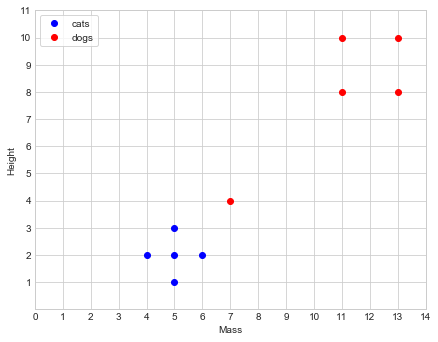

In [101]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5)) 
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'mass'], data.loc[data.label == 'cat', 'height'], 'bo', label='cats') 
    ax.plot(data.loc[data.label == 'dog', 'mass'], data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify legend
    

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')
    
    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

## KNN

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, or 3-NN...?

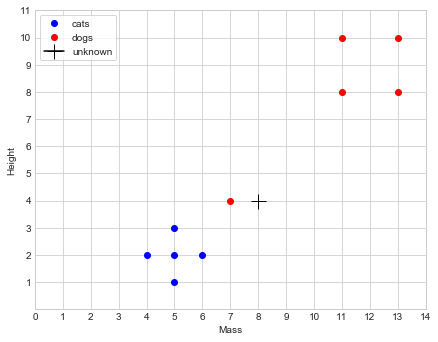

In [102]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
def create_grid(X_train):
#     x = np.arange(min(X_train.x),max(X_train.x), (max(X_train.x)-min(X_train.x))/100 )
#     y = np.arange(min(X_train.y),max(X_train.y), (max(X_train.y)-min(X_train.y))/100 )
    x = np.arange(0, 15, 0.1)
    y = np.arange(0, 12, 0.1)
    xx, yy = np.meshgrid(x, y)
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()}) # Generates all possible combinations
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    X_grid[y_pred=='dog'].plot(x='x',y='y',kind='scatter',s=20,color='red',ax=ax, alpha=0.1, zorder=-1)
    X_grid[y_pred=='cat'].plot(x='x',y='y',kind='scatter',s=20,color='blue',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='dog'].plot(x='x',y='y',kind='scatter',s=40,color='pink',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='cat'].plot(x='x',y='y',kind='scatter',s=40,color='lightblue',ax=ax, alpha=0.1, zorder=-1);

In [105]:
def plot_decision_boundaries(model, data):
    X_train = data.iloc[:, :2]
    X_train.columns = ['x', 'y']
    y_train = data.label
    ax = plot_cats_vs_dogs(data)
    X_grid = create_grid(X_train)
    model = model.fit(X_train, y_train)
    plot_model(ax, X_train, y_train, X_grid, model)

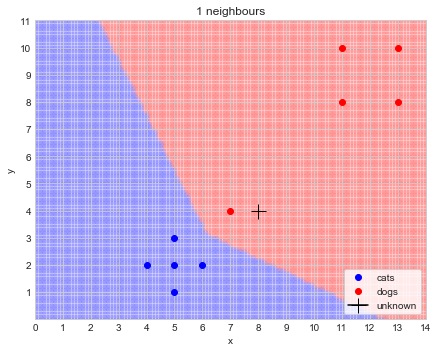

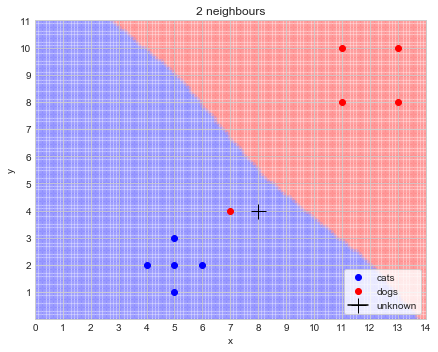

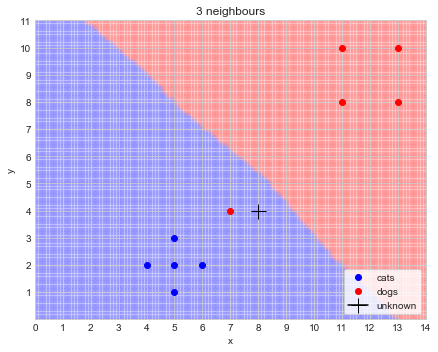

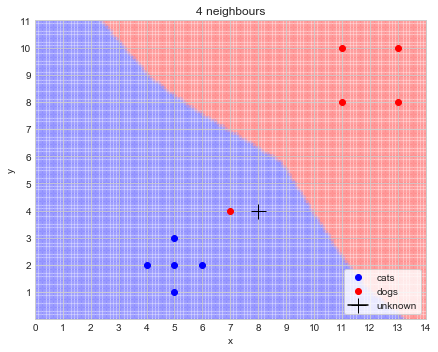

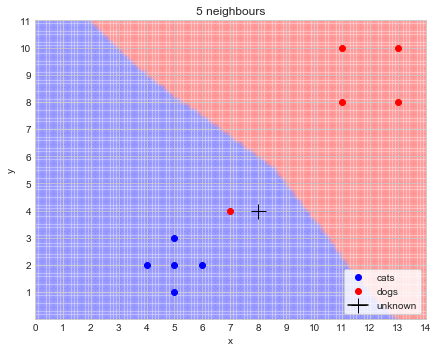

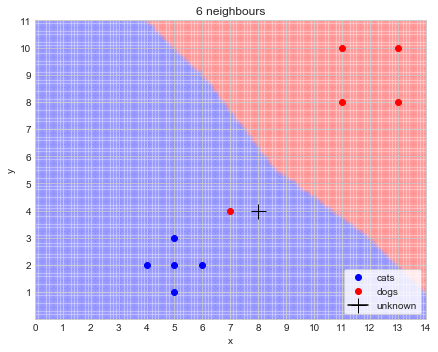

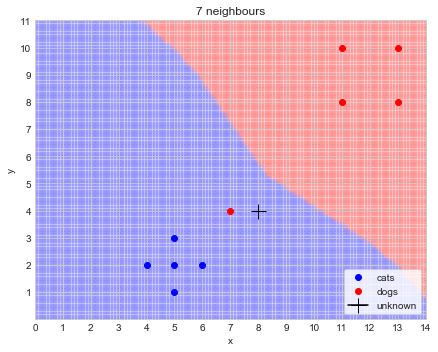

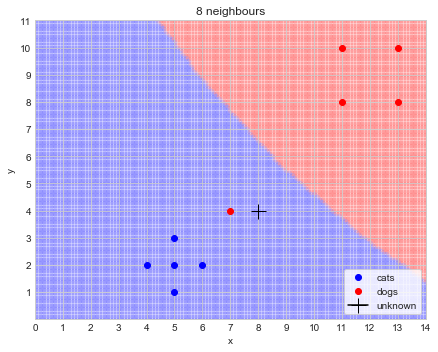

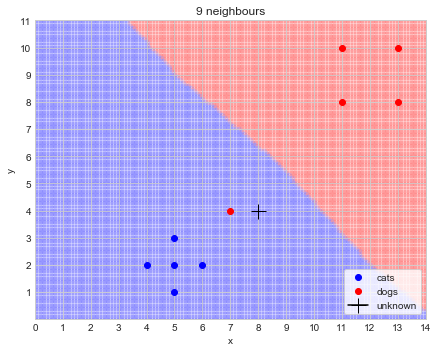

In [106]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

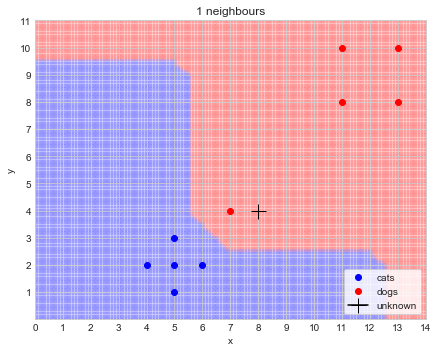

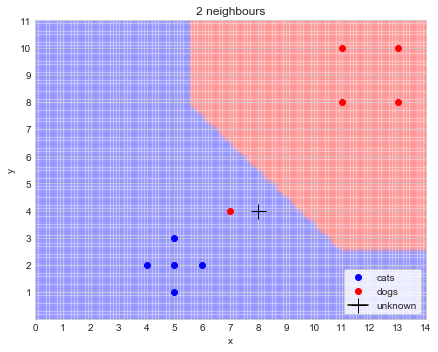

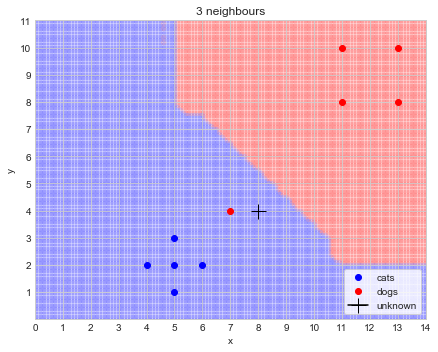

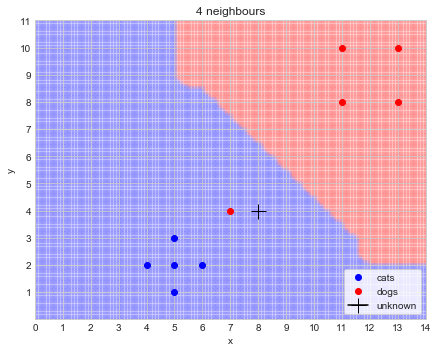

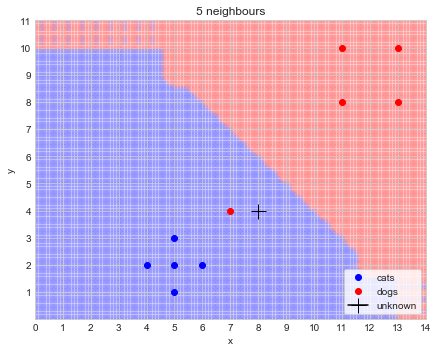

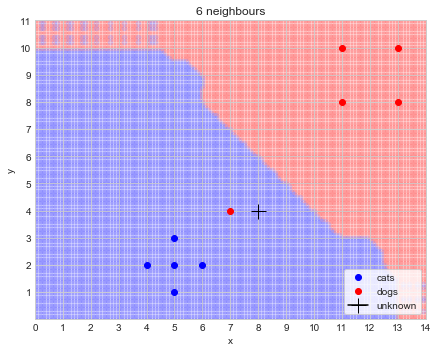

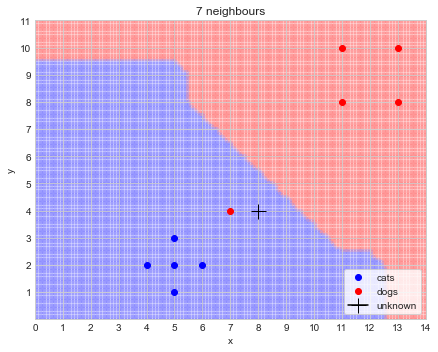

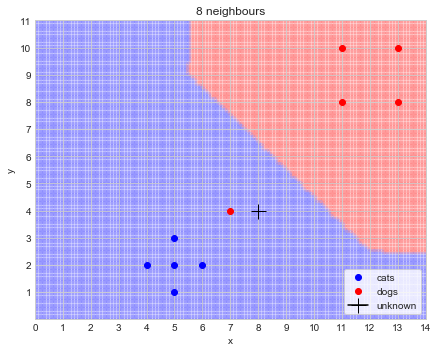

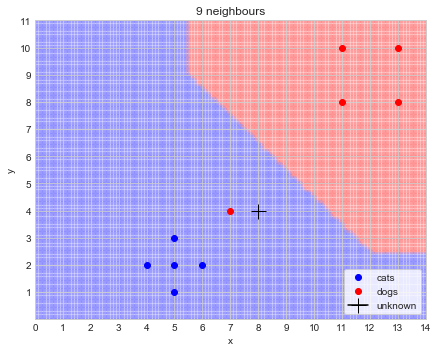

In [107]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

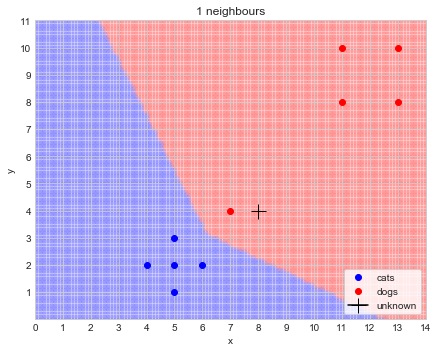

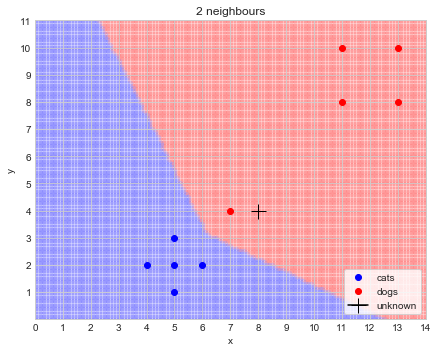

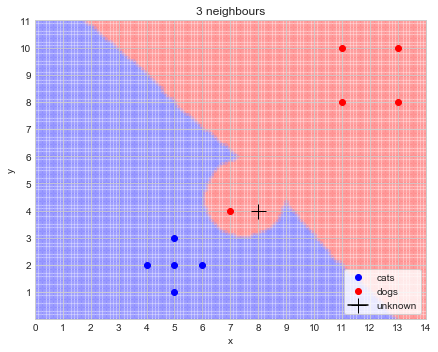

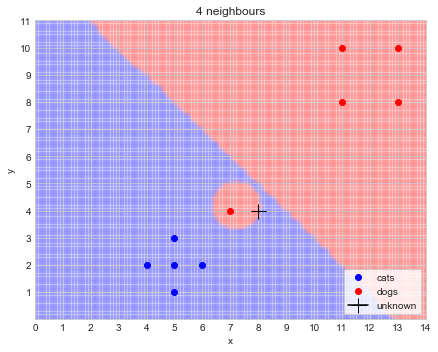

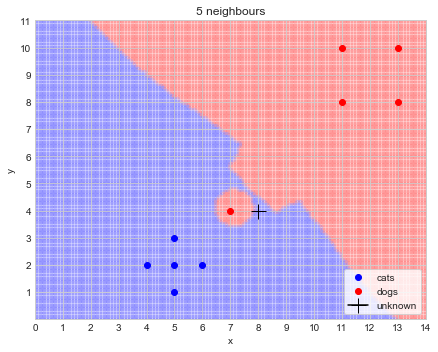

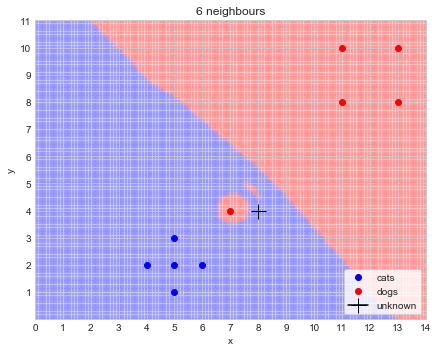

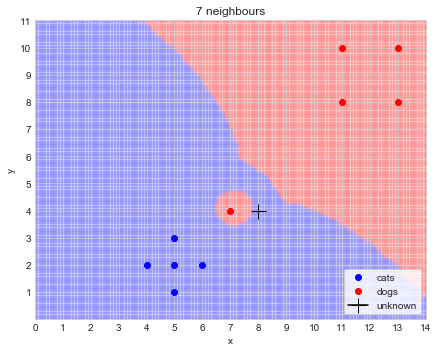

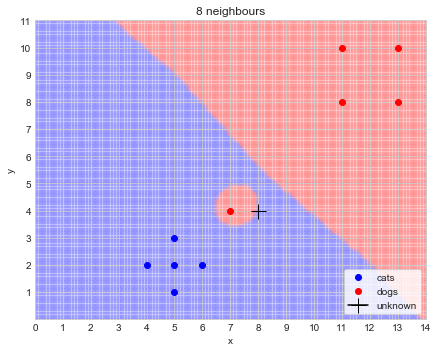

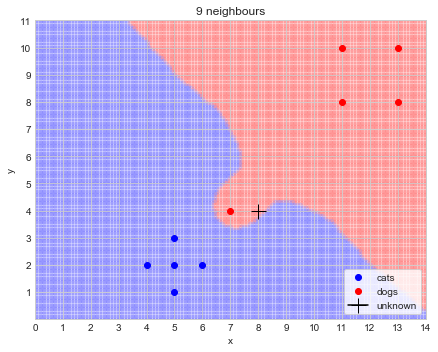

In [108]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()
    

Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

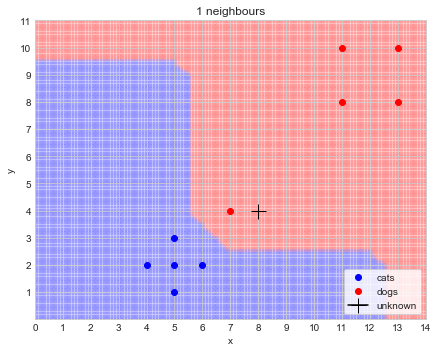

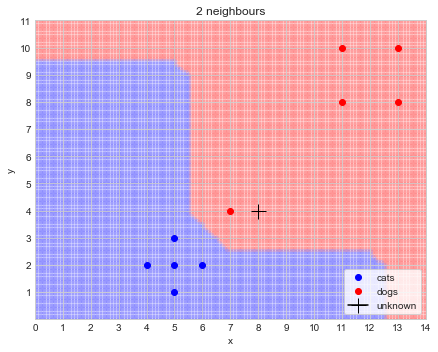

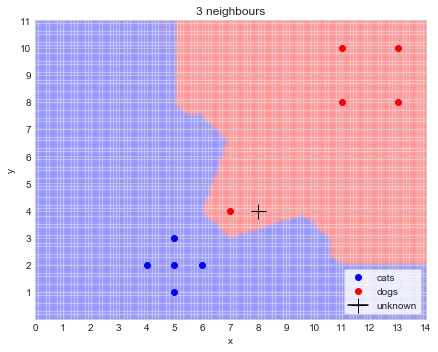

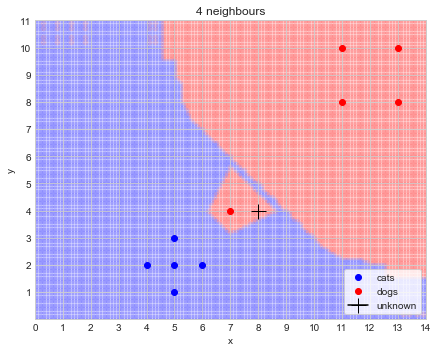

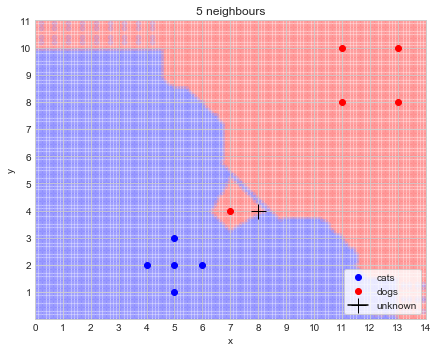

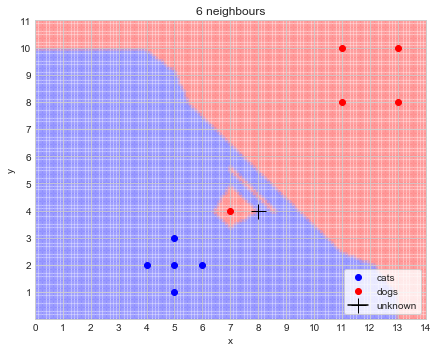

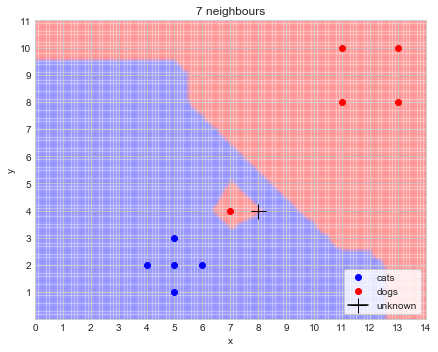

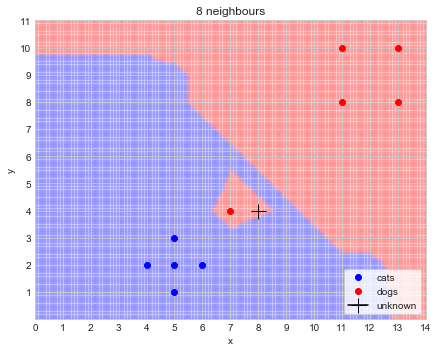

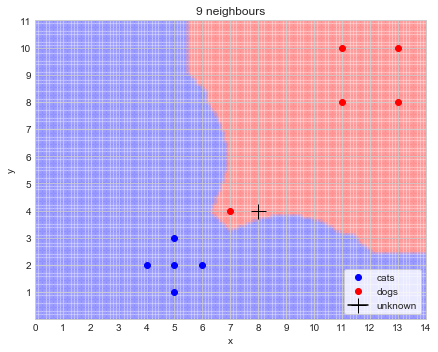

In [109]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()